In [1]:
#I use cv.drawKeypoints() to draw keypoints, cv.drawMatches() helps us to draw the matches. It stacks two images horizontally and draw lines from first image to second image showing best matches. There is also cv.drawMatchesKnn which draws all the k best matches. If k=2, it will draw two match-lines for each keypoint. So we have to pass a mask if we want to selectively draw it.

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread(r"C:\Users\Anura\Desktop\anurag photo.jpg") #Read my photo and queryImage
img2 = cv.imread(r"C:\Users\Anura\Desktop\anurag photo 2.jpg") # train another Image

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [6]:
#Next we create a BFMatcher object with distance measurement cv.NORM_HAMMING (since we are using ORB) and crossCheck is switched on for better results. Then we use Matcher.match() method to get the best matches in two images. We sort them in ascending order of their distances so that best matches (with low distance) come to front. Then we draw only first 10 matches (Just for sake of visibility. You can increase it as you like)

In [ ]:
#Using Brute-Force Matching with ORB Descriptors

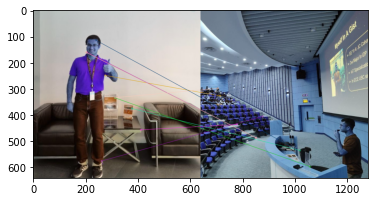

In [7]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2) #Using brute force matching 
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

In [8]:
#Using Brute-Force Matching with SIFT Descriptors and Ratio Test

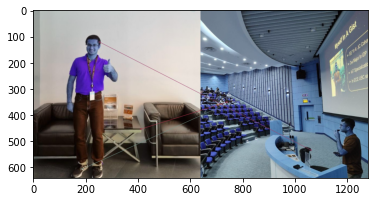

In [9]:
# Create BFMatcher object with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2) #Using SIFT Descriptors
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

In [19]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5) #
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=1)
# Need to draw only good matches, so create a mask

matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3)
plt.show()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\flann\src\miniflann.cpp:336: error: (-210:Unsupported format or combination of formats) in function 'cv::flann::buildIndex_'
> type=0
> 